Exercise - Analyzing Data Science Job Demand

In [58]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [59]:
df_US = df[df['job_country'] == 'United States'].copy()


In [60]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')


In [61]:
df_US_pivot = df_US.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')

In [68]:
df_US_pivot.reset_index(inplace = True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'],format = '%B').dt.month
df_US_pivot.sort_values('month_no', inplace = True)
df_US_pivot.set_index('job_posted_month', inplace = True)
df_US_pivot.drop(columns = 'month_no', inplace = True)
df_US_pivot


job_title_short,level_0,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,,
January,4,4,527,36,8494,2655,6915,60,1544,773,1552,114
February,3,3,447,24,6124,3060,4956,56,1258,878,1127,90
March,7,7,438,19,6218,3183,4779,59,1114,829,1150,115
April,0,0,565,40,6049,2801,4867,51,1025,781,991,112
May,8,8,279,20,4993,2976,4377,49,839,746,914,90
June,6,6,446,32,5683,2893,4645,48,1009,812,1033,93
July,5,5,581,39,5201,2570,4876,65,883,747,1095,153
August,1,1,903,39,6634,3269,6318,68,1186,903,1515,194
September,11,11,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: >

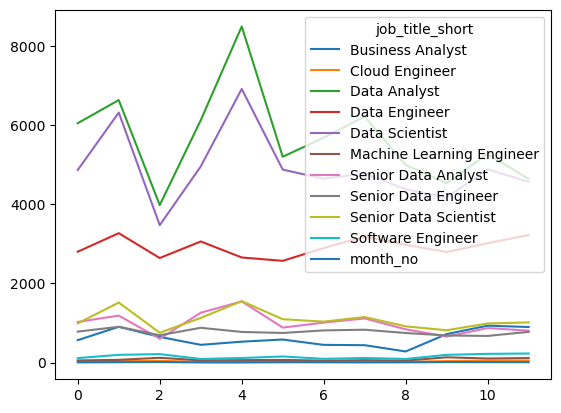

In [63]:
df_US_pivot.plot(kind = 'line')

In [64]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

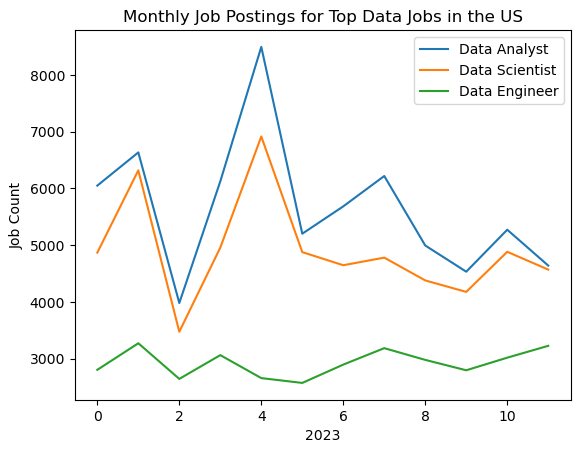

In [65]:
df_US_pivot[top_3].plot(kind = 'line')
plt.xlabel('2023')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.ylabel('Job Count')
plt.legend()
plt.show()